In [145]:
import matplotlib
matplotlib.rcParams['font.size'] = 16
from matplotlib import pyplot
import keras
import numpy

## Neural Networks

These have a long and storied history ...
* 1940s: let's build something that looks like how the brain works!
* 1960s-80s: let's realize these in software! oh, they're difficult...
* 2010s: if we give up on the biological neuron analogy, and use GPUs, we can do very sophisticated things!

Hardware Perceptron from the 1950s: ![Perceptron](https://upload.wikimedia.org/wikipedia/en/5/52/Mark_I_perceptron.jpeg)

Core idea: computational units are like "neurons": they have a bunch of inputs, apply a non-linear "activation function", and produce an output.  The output of a neuron is
$$ f\left(\sum_i w_i x_i + b\right) $$
i.e., a linear combination of inputs $\{x_i\}$ with a potiential bias $b$, and some activation function $f$. The activation function can't be linear, or else the NN will just degenerate to a big linear function.  A standard MultiLayer Perceptron (MLP) consists of multiple layers of neurons, which take inputs either as features or the output of other neurons:
![MLP](https://upload.wikimedia.org/wikipedia/en/5/54/Feed_forward_neural_net.gif)
(A "normal" network would connect all nodes of a layer to all nodes of the layer beneath.) The architecture shown - an "input" layer, a "hidden" layer, and an "output" layer - is quite common for networks of this type; one can adjust the number of hidden layers and the number of neurons/nodes in each layer.

There are many possibilities for the activation function.  For a long time people insisted on functions that had biological analogs, so in particular the sigmoid and $\tanh$ functions. However it is empirically seen that other functions, in particular the Rectified Linear Unit (ReLU) and relatives, are better suited for large networks.

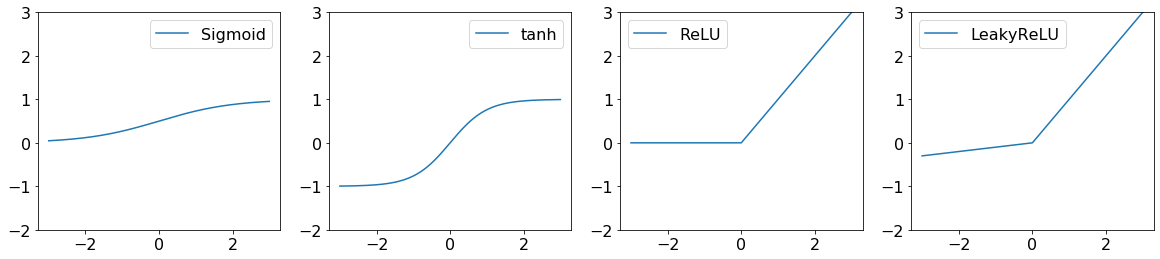

In [146]:
pyplot.figure(figsize=(20,4))
xpts = numpy.linspace(-3,3,301)
pyplot.subplot(1,4,1)
pyplot.plot(xpts, 1/(1+numpy.exp(-xpts)), label='Sigmoid')
pyplot.ylim(-2,3)
pyplot.legend()
pyplot.subplot(1,4,2)
pyplot.plot(xpts, numpy.tanh(xpts), label='tanh')
pyplot.ylim(-2,3)
pyplot.legend()
pyplot.subplot(1,4,3)
pyplot.plot(xpts, numpy.where(xpts>0,xpts,0.*xpts), label='ReLU')
pyplot.ylim(-2,3)
pyplot.legend()
pyplot.subplot(1,4,4)
pyplot.plot(xpts, numpy.where(xpts>0,xpts,0.1*xpts), label='LeakyReLU')
pyplot.ylim(-2,3)
pyplot.legend()
pyplot.draw()

Training a neural network consists of adjusting the weights and biases for every node to optimize the loss function, which is computed from the NN's output.  Modern NN outputs are real-valued and continuous functions of the inputs.  It can be shown that a neural network with one hidden layer (but exponentially many nodes) can approximate any arbitrary multidimensional function; an analogous theorem exists for a sufficiently deep network of enough (finite) width. In practice this fact is not necessarily helpful, but it is reassuring.  If a function exists that can optimize the loss function, in principle a neural network can learn it.

For modern NNs working on classification problems, one usually actually predicts probabilities of the classes, since a NN naturally produces a continuous number as output.  In order to keep the probability between 0 and 1, typically the output layer will have a sigmoid ("logistic") activation $1/(1+e^x)$. Then the NN output, $p(x)$, is the probability prediction for a specific class A, and the loss function is set to be the cross-entropy function:
$$ C = \sum_i -\ln \tilde p(x_i)$$
where
$$ \tilde p(x_i) = \left\{\begin{array}{c} p(x_i),\textrm{ A is the true class}\\ 1-p(x_i),\textrm{ A is not the true class}\end{array}\right.$$
(i.e. the sum of the minus log probabilities that the NN would assign to the true labels).

One can make a "multiclass" NN (to give probabilities for each of $N$ possible outputs) by having $N$ outputs subject to the _softmax_ function
$$ f(x_1, \ldots, x_N) = \frac{1}{\sum_i e^{x_i}} \left[e^{x_1}, \ldots, e^{x_n}\right] $$

A couple more notes before we train our first NN: 
* modern neural networks are trained using _gradient descent_ (in general), which uses the gradient of the loss function as a function of all the parameters of the NN (the weights and biases) to figure out how to update the parameters to improve the loss at each step.  The gradient is computed and the weights updated with _backpropagation_, which is a fancy way of saying "chain rule".  (For this reason it is important that the activation functions have defined derivatives.)
* a *batch size* is the number of samples used every time the gradient is evaluated.  This can be much smaller than the sample size (which provides some amount of resilience against overtraining, but usually makes training and convergence slower.
* an *epoch* is a complete pass through all the training batches (depending on the batch size, there may be many of them). Typically one needs hundreds or thousands of epochs; one typically runs until the loss function stops improving.  You may get stuck in a false minimum for a while on the way to a global minimum.

Epoch 1/200
500/500 [==============================] - 0s 301us/step - loss: 0.6221
Epoch 2/200
500/500 [==============================] - 0s 76us/step - loss: 0.6123
Epoch 3/200
500/500 [==============================] - 0s 132us/step - loss: 0.6041
Epoch 4/200
500/500 [==============================] - 0s 91us/step - loss: 0.5973
Epoch 5/200
500/500 [==============================] - 0s 82us/step - loss: 0.5916
Epoch 6/200
500/500 [==============================] - 0s 36us/step - loss: 0.5861
Epoch 7/200
500/500 [==============================] - 0s 24us/step - loss: 0.5811
Epoch 8/200
500/500 [==============================] - 0s 19us/step - loss: 0.5762
Epoch 9/200
500/500 [==============================] - 0s 20us/step - loss: 0.5716
Epoch 10/200
500/500 [==============================] - 0s 76us/step - loss: 0.5669
Epoch 11/200
500/500 [==============================] - 0s 43us/step - loss: 0.5622
Epoch 12/200
500/500 [==============================] - 0s 32us/step - loss: 0.5577

500/500 [==============================] - 0s 45us/step - loss: 0.1986
Epoch 99/200
500/500 [==============================] - 0s 113us/step - loss: 0.1967
Epoch 100/200
500/500 [==============================] - 0s 71us/step - loss: 0.1949
Epoch 101/200
500/500 [==============================] - 0s 54us/step - loss: 0.1933
Epoch 102/200
500/500 [==============================] - 0s 42us/step - loss: 0.1914
Epoch 103/200
500/500 [==============================] - 0s 100us/step - loss: 0.1897
Epoch 104/200
500/500 [==============================] - 0s 66us/step - loss: 0.1881
Epoch 105/200
500/500 [==============================] - 0s 58us/step - loss: 0.1869
Epoch 106/200
500/500 [==============================] - 0s 57us/step - loss: 0.1850
Epoch 107/200
500/500 [==============================] - 0s 56us/step - loss: 0.1837
Epoch 108/200
500/500 [==============================] - 0s 55us/step - loss: 0.1819
Epoch 109/200
500/500 [==============================] - 0s 49us/step - loss: 

500/500 [==============================] - 0s 49us/step - loss: 0.1025
Epoch 195/200
500/500 [==============================] - 0s 53us/step - loss: 0.1017
Epoch 196/200
500/500 [==============================] - 0s 68us/step - loss: 0.1013
Epoch 197/200
500/500 [==============================] - 0s 96us/step - loss: 0.1009
Epoch 198/200
500/500 [==============================] - 0s 120us/step - loss: 0.1005
Epoch 199/200
500/500 [==============================] - 0s 100us/step - loss: 0.0996
Epoch 200/200
22801/22801 [==============================] - 0s 12us/step


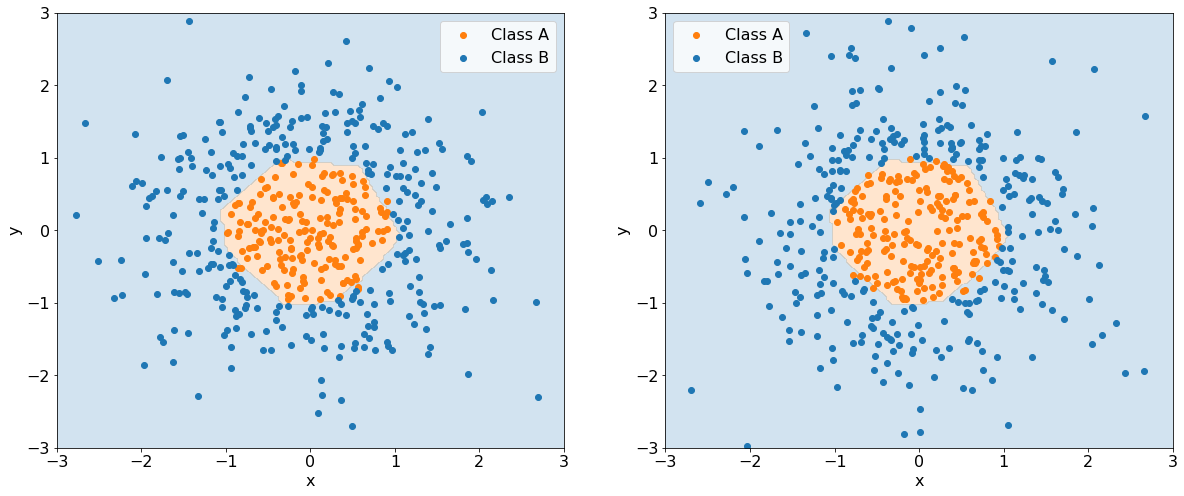

In [154]:
numpy.random.seed(20)
xy = numpy.random.normal(size=[500,2])
radii = numpy.hypot(xy[...,0],xy[...,1])
classes = (radii>1).astype(float)
xytest = numpy.random.normal(size=[500,2])
radiitest = numpy.hypot(xytest[...,0],xytest[...,1])
classestest = (radiitest>1).astype(float)

# define a Keras model
def create_model(layers=(5,5), regularizer=None, activation='relu'):
    from keras.models import Sequential # feed-forward neural network (sequential layers)
    from keras.layers import Dense # fully interconnected layers
    model = Sequential()
    # input layer: 5 nodes by default (2 features to input to each node), relu activation. Weights will be initialized
    # with random values in a certain range
    model.add(Dense(layers[0], input_dim=2, activation=activation, kernel_regularizer=regularizer))
    # hidden layer: 5 nodes by default
    model.add(Dense(layers[0], activation=activation, kernel_regularizer=regularizer))
    # one output, mapped to [0,1] by sigmoid function
    model.add(Dense(1, activation='sigmoid'))
    # assemble the model (Translate to TensorFlow)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
model=KerasClassifier(build_fn=create_model, verbose=1)
result=model.fit(xy, classes, epochs=200)

xx, yy = numpy.meshgrid(numpy.linspace(-3, 3, 151), numpy.linspace(-3,3,151))
vals = model.predict(numpy.c_[xx.ravel(), yy.ravel()]).astype(float)
vals=vals.reshape(xx.shape)

pyplot.figure(figsize=(20,8))
pyplot.subplot(1,2,1)
pyplot.contourf(xx, yy, vals, levels=[-0.50, 0.50, 1.50], colors=['tab:orange', 'tab:blue'], alpha=0.2)
pyplot.scatter(numpy.extract(radii<1, xy[...,0]), numpy.extract(radii<1, xy[...,1]), label='Class A', color='tab:orange')
pyplot.scatter(numpy.extract(radii>1, xy[...,0]), numpy.extract(radii>1, xy[...,1]), label='Class B', color='tab:blue')
pyplot.xlabel('x'); pyplot.ylabel('y')
pyplot.xlim(-3,3); pyplot.ylim(-3,3)
pyplot.legend()

pyplot.subplot(1,2,2)
pyplot.contourf(xx, yy, vals, levels=[-0.50, 0.50, 1.50], colors=['tab:orange', 'tab:blue'], alpha=0.2)
pyplot.scatter(numpy.extract(radiitest<1, xytest[...,0]), numpy.extract(radiitest<1, xytest[...,1]), label='Class A', color='tab:orange')
pyplot.scatter(numpy.extract(radiitest>1, xytest[...,0]), numpy.extract(radiitest>1, xytest[...,1]), label='Class B', color='tab:blue')
pyplot.xlabel('x'); pyplot.ylabel('y')
pyplot.xlim(-3,3); pyplot.ylim(-3,3)
pyplot.legend()
pyplot.draw()

The Keras scikit-learn classifier interface gives a classification based on the probability output by the NN; we can look at this directly:

22801/22801 [==============================] - 0s 13us/step


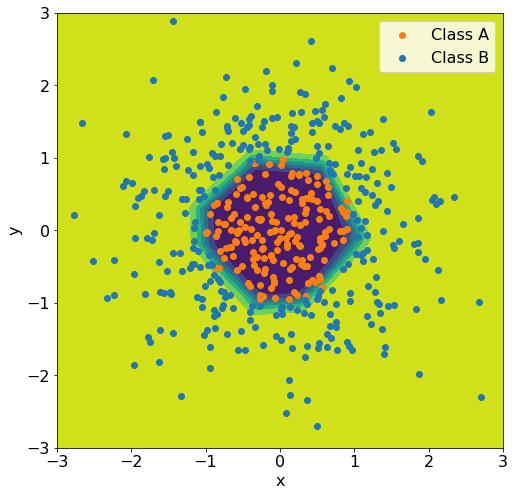

In [155]:
vals = model.predict_proba(numpy.c_[xx.ravel(), yy.ravel()]).astype(float)
vals=vals[...,1].reshape(xx.shape)

pyplot.figure(figsize=(8,8))
pyplot.contourf(xx,yy,vals)
pyplot.scatter(numpy.extract(radii<1, xy[...,0]), numpy.extract(radii<1, xy[...,1]), label='Class A', color='tab:orange')
pyplot.scatter(numpy.extract(radii>1, xy[...,0]), numpy.extract(radii>1, xy[...,1]), label='Class B', color='tab:blue')
pyplot.xlabel('x'); pyplot.ylabel('y')
pyplot.xlim(-3,3); pyplot.ylim(-3,3)
pyplot.legend()
pyplot.draw()

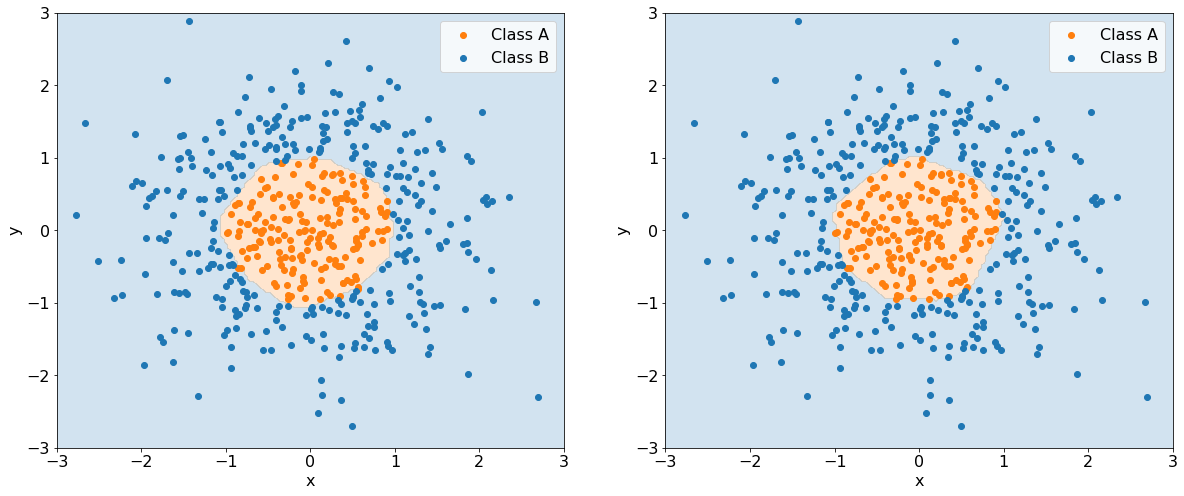

In [149]:
model2=KerasClassifier(build_fn=create_model, layers=(10,5), verbose=0)
model2.fit(xy, classes, epochs=200)
model3=KerasClassifier(build_fn=create_model, layers=(5,10), verbose=0)
model3.fit(xy, classes, epochs=200)


pyplot.figure(figsize=(20,8))
pyplot.subplot(1,2,1)
vals = model2.predict(numpy.c_[xx.ravel(), yy.ravel()]).astype(float)
vals=vals.reshape(xx.shape)
pyplot.contourf(xx, yy, vals, levels=[-0.50, 0.50, 1.50], colors=['tab:orange', 'tab:blue'], alpha=0.2)
pyplot.scatter(numpy.extract(radii<1, xy[...,0]), numpy.extract(radii<1, xy[...,1]), label='Class A', color='tab:orange')
pyplot.scatter(numpy.extract(radii>1, xy[...,0]), numpy.extract(radii>1, xy[...,1]), label='Class B', color='tab:blue')
pyplot.xlabel('x'); pyplot.ylabel('y')
pyplot.xlim(-3,3); pyplot.ylim(-3,3)
pyplot.legend()
pyplot.subplot(1,2,2)
vals = model3.predict(numpy.c_[xx.ravel(), yy.ravel()]).astype(float)
vals=vals.reshape(xx.shape)
pyplot.contourf(xx, yy, vals, levels=[-0.50, 0.50, 1.50], colors=['tab:orange', 'tab:blue'], alpha=0.2)
pyplot.scatter(numpy.extract(radii<1, xy[...,0]), numpy.extract(radii<1, xy[...,1]), label='Class A', color='tab:orange')
pyplot.scatter(numpy.extract(radii>1, xy[...,0]), numpy.extract(radii>1, xy[...,1]), label='Class B', color='tab:blue')
pyplot.xlabel('x'); pyplot.ylabel('y')
pyplot.xlim(-3,3); pyplot.ylim(-3,3)
pyplot.legend()
pyplot.draw()

Let's look at the performance when we can't actually separate the models...

Epoch 1/100
500/500 [==============================] - 0s 491us/step - loss: 0.6966
Epoch 2/100
500/500 [==============================] - 0s 70us/step - loss: 0.6962
Epoch 3/100
500/500 [==============================] - 0s 117us/step - loss: 0.6957
Epoch 4/100
500/500 [==============================] - 0s 85us/step - loss: 0.6954
Epoch 5/100
500/500 [==============================] - 0s 89us/step - loss: 0.6950
Epoch 6/100
500/500 [==============================] - 0s 107us/step - loss: 0.6947
Epoch 7/100
500/500 [==============================] - 0s 93us/step - loss: 0.6945
Epoch 8/100
500/500 [==============================] - 0s 86us/step - loss: 0.6942
Epoch 9/100
500/500 [==============================] - 0s 89us/step - loss: 0.6940
Epoch 10/100
500/500 [==============================] - 0s 81us/step - loss: 0.6938
Epoch 11/100
500/500 [==============================] - 0s 82us/step - loss: 0.6938
Epoch 12/100
500/500 [==============================] - 0s 88us/step - loss: 0.693

500/500 [==============================] - 0s 105us/step - loss: 0.6882
Epoch 99/100
500/500 [==============================] - 0s 102us/step - loss: 0.6881
Epoch 100/100
500/500 [==============================] - 0s 139us/step - loss: 0.6880


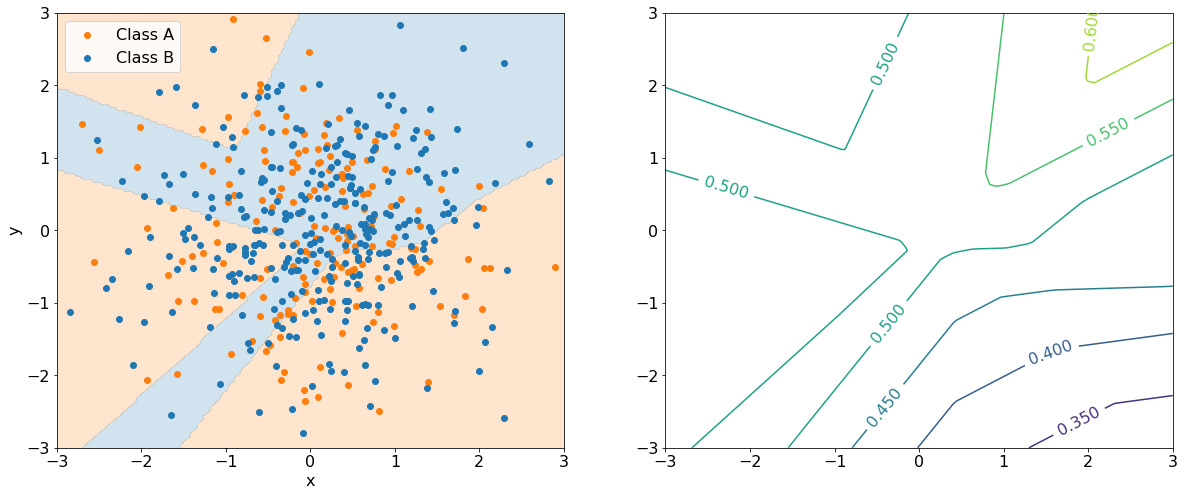

In [150]:
numpy.random.seed(25)
xy = numpy.random.normal(size=[500,2])
xytest = numpy.random.normal(size=[500,2])
classes = numpy.zeros(500).astype(int); classes[250:]=1
model4 = KerasClassifier(build_fn=create_model)
model4.fit(xy, classes, epochs=100, verbose=True)
vals = model4.predict(numpy.c_[xx.ravel(), yy.ravel()]).astype(float)
vals=vals.reshape(xx.shape)
pyplot.figure(figsize=(20,8))
pyplot.subplot(1,2,1)
pyplot.contourf(xx, yy, vals, levels=[-0.50, 0.50, 1.50], colors=['tab:orange', 'tab:blue'], alpha=0.2)
pyplot.scatter(numpy.extract(radii<1, xy[...,0]), numpy.extract(radii<1, xy[...,1]), label='Class A', color='tab:orange')
pyplot.scatter(numpy.extract(radii>1, xy[...,0]), numpy.extract(radii>1, xy[...,1]), label='Class B', color='tab:blue')
pyplot.xlabel('x'); pyplot.ylabel('y')
pyplot.xlim(-3,3); pyplot.ylim(-3,3)
pyplot.legend()
pyplot.subplot(1,2,2)
c=pyplot.contour(xx, yy, model4.predict_proba(numpy.c_[xx.ravel(), yy.ravel()]).astype(float)[...,1].reshape(xx.shape))
pyplot.clabel(c)
pyplot.draw()

The NN has to have _some_ output (and the classifier forces the result to 0 or 1) but the probabilities indicate that it is really unsure in most parts of the plot whether to assign to class A or B.  This indicates one of the advantages of "standard" NNs over decision trees: it's generally harder to overtrain them.  

The loss function flattens out at $\approx 0.69$; not coincidentally $-2 \times 0.5 \ln 0.5 = 0.693$, which is the entropy when you can't tell the classes apart.

The following illustrates what you have to do to get a NN to overtrain somewhat (have a lot of nodes):

Epoch 1/1000
500/500 [==============================] - 0s 465us/step - loss: 0.6968
Epoch 2/1000
500/500 [==============================] - 0s 90us/step - loss: 0.6908
Epoch 3/1000
500/500 [==============================] - 0s 96us/step - loss: 0.6898
Epoch 4/1000
500/500 [==============================] - 0s 91us/step - loss: 0.6891
Epoch 5/1000
500/500 [==============================] - 0s 106us/step - loss: 0.6882
Epoch 6/1000
500/500 [==============================] - 0s 87us/step - loss: 0.6884
Epoch 7/1000
500/500 [==============================] - 0s 124us/step - loss: 0.6876
Epoch 8/1000
500/500 [==============================] - 0s 107us/step - loss: 0.6872
Epoch 9/1000
500/500 [==============================] - 0s 78us/step - loss: 0.6864
Epoch 10/1000
500/500 [==============================] - 0s 101us/step - loss: 0.6861
Epoch 11/1000
500/500 [==============================] - 0s 132us/step - loss: 0.6863
Epoch 12/1000
500/500 [==============================] - 0s 88us/ste

Epoch 97/1000
500/500 [==============================] - 0s 94us/step - loss: 0.6718
Epoch 98/1000
500/500 [==============================] - 0s 73us/step - loss: 0.6734
Epoch 99/1000
500/500 [==============================] - 0s 92us/step - loss: 0.6720
Epoch 100/1000
500/500 [==============================] - 0s 93us/step - loss: 0.6711
Epoch 101/1000
500/500 [==============================] - 0s 85us/step - loss: 0.6718
Epoch 102/1000
500/500 [==============================] - 0s 80us/step - loss: 0.6706
Epoch 103/1000
500/500 [==============================] - 0s 77us/step - loss: 0.6713
Epoch 104/1000
500/500 [==============================] - 0s 80us/step - loss: 0.6699
Epoch 105/1000
500/500 [==============================] - 0s 87us/step - loss: 0.6701
Epoch 106/1000
500/500 [==============================] - 0s 104us/step - loss: 0.6707
Epoch 107/1000
500/500 [==============================] - 0s 109us/step - loss: 0.6690
Epoch 108/1000
500/500 [==============================]

500/500 [==============================] - 0s 125us/step - loss: 0.6576
Epoch 193/1000
500/500 [==============================] - 0s 92us/step - loss: 0.6589
Epoch 194/1000
500/500 [==============================] - 0s 95us/step - loss: 0.6575
Epoch 195/1000
500/500 [==============================] - 0s 104us/step - loss: 0.6570
Epoch 196/1000
500/500 [==============================] - 0s 92us/step - loss: 0.6577
Epoch 197/1000
500/500 [==============================] - 0s 86us/step - loss: 0.6577
Epoch 198/1000
500/500 [==============================] - 0s 76us/step - loss: 0.6569
Epoch 199/1000
500/500 [==============================] - 0s 75us/step - loss: 0.6580
Epoch 200/1000
500/500 [==============================] - 0s 84us/step - loss: 0.6592
Epoch 201/1000
500/500 [==============================] - 0s 97us/step - loss: 0.6591
Epoch 202/1000
500/500 [==============================] - 0s 94us/step - loss: 0.6602
Epoch 203/1000
500/500 [==============================] - 0s 77us/s

500/500 [==============================] - 0s 131us/step - loss: 0.6508
Epoch 288/1000
500/500 [==============================] - 0s 102us/step - loss: 0.6502
Epoch 289/1000
500/500 [==============================] - 0s 97us/step - loss: 0.6464
Epoch 290/1000
500/500 [==============================] - 0s 88us/step - loss: 0.6495
Epoch 291/1000
500/500 [==============================] - 0s 83us/step - loss: 0.6493
Epoch 292/1000
500/500 [==============================] - 0s 88us/step - loss: 0.6475
Epoch 293/1000
500/500 [==============================] - 0s 87us/step - loss: 0.6474
Epoch 294/1000
500/500 [==============================] - 0s 80us/step - loss: 0.6485
Epoch 295/1000
500/500 [==============================] - 0s 91us/step - loss: 0.6507
Epoch 296/1000
500/500 [==============================] - 0s 104us/step - loss: 0.6449
Epoch 297/1000
500/500 [==============================] - 0s 99us/step - loss: 0.6502
Epoch 298/1000
500/500 [==============================] - 0s 74us/

500/500 [==============================] - 0s 121us/step - loss: 0.6418
Epoch 382/1000
500/500 [==============================] - 0s 108us/step - loss: 0.6430
Epoch 383/1000
500/500 [==============================] - 0s 83us/step - loss: 0.6393
Epoch 384/1000
500/500 [==============================] - 0s 90us/step - loss: 0.6400
Epoch 385/1000
500/500 [==============================] - 0s 93us/step - loss: 0.6389
Epoch 386/1000
500/500 [==============================] - 0s 100us/step - loss: 0.6403
Epoch 387/1000
500/500 [==============================] - 0s 130us/step - loss: 0.6402
Epoch 388/1000
500/500 [==============================] - 0s 109us/step - loss: 0.6397
Epoch 389/1000
500/500 [==============================] - 0s 97us/step - loss: 0.6397
Epoch 390/1000
500/500 [==============================] - 0s 134us/step - loss: 0.6400
Epoch 391/1000
500/500 [==============================] - 0s 109us/step - loss: 0.6401
Epoch 392/1000
500/500 [==============================] - 0s 8

500/500 [==============================] - 0s 80us/step - loss: 0.6319
Epoch 476/1000
500/500 [==============================] - 0s 111us/step - loss: 0.6332
Epoch 477/1000
500/500 [==============================] - 0s 89us/step - loss: 0.6328
Epoch 478/1000
500/500 [==============================] - 0s 81us/step - loss: 0.6334
Epoch 479/1000
500/500 [==============================] - 0s 83us/step - loss: 0.6344
Epoch 480/1000
500/500 [==============================] - 0s 89us/step - loss: 0.6336
Epoch 481/1000
500/500 [==============================] - 0s 94us/step - loss: 0.6342
Epoch 482/1000
500/500 [==============================] - 0s 96us/step - loss: 0.6328
Epoch 483/1000
500/500 [==============================] - 0s 102us/step - loss: 0.6346
Epoch 484/1000
500/500 [==============================] - 0s 101us/step - loss: 0.6315
Epoch 485/1000
500/500 [==============================] - 0s 85us/step - loss: 0.6331
Epoch 486/1000
500/500 [==============================] - 0s 121us

500/500 [==============================] - 0s 127us/step - loss: 0.6253
Epoch 570/1000
500/500 [==============================] - 0s 123us/step - loss: 0.6290
Epoch 571/1000
500/500 [==============================] - 0s 108us/step - loss: 0.6244
Epoch 572/1000
500/500 [==============================] - 0s 101us/step - loss: 0.6256
Epoch 573/1000
500/500 [==============================] - 0s 86us/step - loss: 0.6249
Epoch 574/1000
500/500 [==============================] - 0s 93us/step - loss: 0.6234
Epoch 575/1000
500/500 [==============================] - 0s 110us/step - loss: 0.6231
Epoch 576/1000
500/500 [==============================] - 0s 135us/step - loss: 0.6231
Epoch 577/1000
500/500 [==============================] - 0s 109us/step - loss: 0.6224
Epoch 578/1000
500/500 [==============================] - 0s 84us/step - loss: 0.6230
Epoch 579/1000
500/500 [==============================] - 0s 85us/step - loss: 0.6263
Epoch 580/1000
500/500 [==============================] - 0s 1

Epoch 664/1000
500/500 [==============================] - 0s 133us/step - loss: 0.6113
Epoch 665/1000
500/500 [==============================] - 0s 111us/step - loss: 0.6197
Epoch 666/1000
500/500 [==============================] - 0s 123us/step - loss: 0.6153
Epoch 667/1000
500/500 [==============================] - 0s 136us/step - loss: 0.6202
Epoch 668/1000
500/500 [==============================] - 0s 99us/step - loss: 0.6177
Epoch 669/1000
500/500 [==============================] - 0s 89us/step - loss: 0.6155
Epoch 670/1000
500/500 [==============================] - 0s 97us/step - loss: 0.6162
Epoch 671/1000
500/500 [==============================] - 0s 102us/step - loss: 0.6164
Epoch 672/1000
500/500 [==============================] - 0s 154us/step - loss: 0.6144
Epoch 673/1000
500/500 [==============================] - 0s 106us/step - loss: 0.6145
Epoch 674/1000
500/500 [==============================] - 0s 92us/step - loss: 0.6130
Epoch 675/1000
500/500 [=======================

500/500 [==============================] - 0s 77us/step - loss: 0.6089
Epoch 759/1000
500/500 [==============================] - 0s 94us/step - loss: 0.6085
Epoch 760/1000
500/500 [==============================] - 0s 103us/step - loss: 0.6054
Epoch 761/1000
500/500 [==============================] - 0s 100us/step - loss: 0.6062
Epoch 762/1000
500/500 [==============================] - 0s 87us/step - loss: 0.6098
Epoch 763/1000
500/500 [==============================] - 0s 92us/step - loss: 0.6063
Epoch 764/1000
500/500 [==============================] - 0s 98us/step - loss: 0.6073
Epoch 765/1000
500/500 [==============================] - 0s 113us/step - loss: 0.6093
Epoch 766/1000
500/500 [==============================] - 0s 99us/step - loss: 0.6061
Epoch 767/1000
500/500 [==============================] - 0s 80us/step - loss: 0.6112
Epoch 768/1000
500/500 [==============================] - 0s 86us/step - loss: 0.6039
Epoch 769/1000
500/500 [==============================] - 0s 101us

Epoch 853/1000
500/500 [==============================] - 0s 82us/step - loss: 0.6012
Epoch 854/1000
500/500 [==============================] - 0s 109us/step - loss: 0.6004
Epoch 855/1000
500/500 [==============================] - 0s 70us/step - loss: 0.6015
Epoch 856/1000
500/500 [==============================] - 0s 76us/step - loss: 0.5993
Epoch 857/1000
500/500 [==============================] - 0s 80us/step - loss: 0.5989
Epoch 858/1000
500/500 [==============================] - 0s 78us/step - loss: 0.5980
Epoch 859/1000
500/500 [==============================] - 0s 84us/step - loss: 0.6040
Epoch 860/1000
500/500 [==============================] - 0s 82us/step - loss: 0.5989
Epoch 861/1000
500/500 [==============================] - 0s 90us/step - loss: 0.5983
Epoch 862/1000
500/500 [==============================] - 0s 73us/step - loss: 0.5962
Epoch 863/1000
500/500 [==============================] - 0s 77us/step - loss: 0.6104
Epoch 864/1000
500/500 [=============================

500/500 [==============================] - 0s 78us/step - loss: 0.5904
Epoch 949/1000
500/500 [==============================] - 0s 87us/step - loss: 0.5944
Epoch 950/1000
500/500 [==============================] - 0s 75us/step - loss: 0.5902
Epoch 951/1000
500/500 [==============================] - 0s 74us/step - loss: 0.5891
Epoch 952/1000
500/500 [==============================] - 0s 72us/step - loss: 0.5937
Epoch 953/1000
500/500 [==============================] - 0s 76us/step - loss: 0.5900
Epoch 954/1000
500/500 [==============================] - 0s 92us/step - loss: 0.5890
Epoch 955/1000
500/500 [==============================] - 0s 92us/step - loss: 0.5897
Epoch 956/1000
500/500 [==============================] - 0s 86us/step - loss: 0.5905
Epoch 957/1000
500/500 [==============================] - 0s 69us/step - loss: 0.5890
Epoch 958/1000
500/500 [==============================] - 0s 69us/step - loss: 0.5903
Epoch 959/1000
500/500 [==============================] - 0s 88us/ste

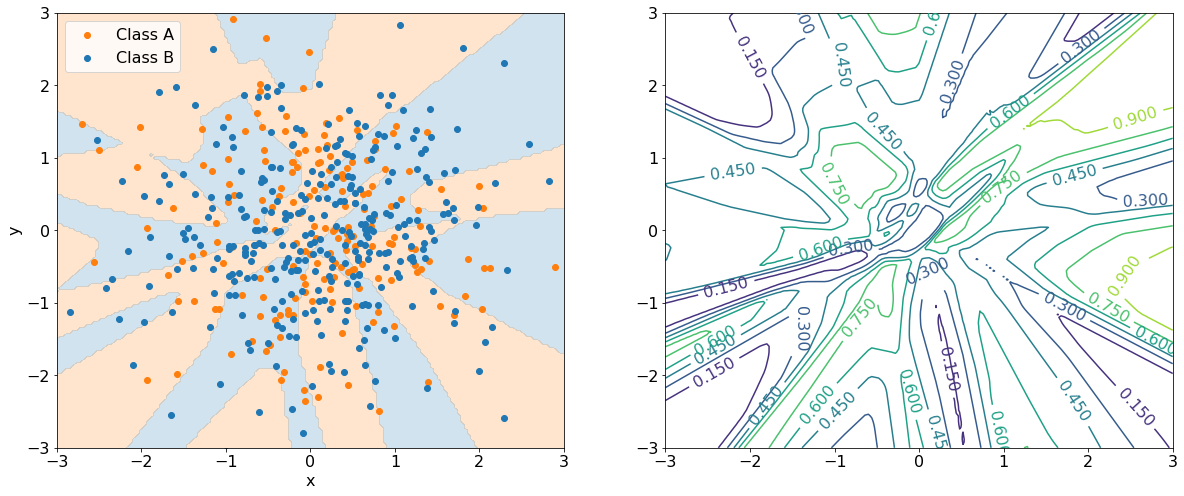

In [151]:
model4 = KerasClassifier(build_fn=create_model, layers=(50,50))
model4.fit(xy, classes, epochs=1000, verbose=True)
vals = model4.predict(numpy.c_[xx.ravel(), yy.ravel()]).astype(float)
vals=vals.reshape(xx.shape)
pyplot.figure(figsize=(20,8))
pyplot.subplot(1,2,1)
pyplot.contourf(xx, yy, vals, levels=[-0.50, 0.50, 1.50], colors=['tab:orange', 'tab:blue'], alpha=0.2)
pyplot.scatter(numpy.extract(radii<1, xy[...,0]), numpy.extract(radii<1, xy[...,1]), label='Class A', color='tab:orange')
pyplot.scatter(numpy.extract(radii>1, xy[...,0]), numpy.extract(radii>1, xy[...,1]), label='Class B', color='tab:blue')
pyplot.xlabel('x'); pyplot.ylabel('y')
pyplot.xlim(-3,3); pyplot.ylim(-3,3)
pyplot.legend()
pyplot.subplot(1,2,2)
c=pyplot.contour(xx, yy, model4.predict_proba(numpy.c_[xx.ravel(), yy.ravel()]).astype(float)[...,1].reshape(xx.shape))
pyplot.clabel(c)
pyplot.draw()

This can be largely solved, for example, by imposing a _regularizer_ which prevents the weights from getting too large:

Epoch 1/500
500/500 [==============================] - 0s 372us/step - loss: 1.1974
Epoch 2/500
500/500 [==============================] - 0s 59us/step - loss: 1.1196
Epoch 3/500
500/500 [==============================] - 0s 71us/step - loss: 1.0523
Epoch 4/500
500/500 [==============================] - 0s 79us/step - loss: 0.9949
Epoch 5/500
500/500 [==============================] - 0s 73us/step - loss: 0.9471
Epoch 6/500
500/500 [==============================] - 0s 67us/step - loss: 0.9064
Epoch 7/500
500/500 [==============================] - 0s 64us/step - loss: 0.8714
Epoch 8/500
500/500 [==============================] - 0s 75us/step - loss: 0.8426
Epoch 9/500
500/500 [==============================] - 0s 91us/step - loss: 0.8182
Epoch 10/500
500/500 [==============================] - 0s 78us/step - loss: 0.7974
Epoch 11/500
500/500 [==============================] - 0s 76us/step - loss: 0.7799
Epoch 12/500
500/500 [==============================] - 0s 64us/step - loss: 0.7662


500/500 [==============================] - 0s 67us/step - loss: 0.6930
Epoch 99/500
500/500 [==============================] - 0s 72us/step - loss: 0.6931
Epoch 100/500
500/500 [==============================] - 0s 70us/step - loss: 0.6931
Epoch 101/500
500/500 [==============================] - 0s 89us/step - loss: 0.6931
Epoch 102/500
500/500 [==============================] - 0s 84us/step - loss: 0.6940
Epoch 103/500
500/500 [==============================] - 0s 82us/step - loss: 0.6932
Epoch 104/500
500/500 [==============================] - 0s 91us/step - loss: 0.6930
Epoch 105/500
500/500 [==============================] - 0s 76us/step - loss: 0.6932
Epoch 106/500
500/500 [==============================] - 0s 76us/step - loss: 0.6941
Epoch 107/500
500/500 [==============================] - 0s 87us/step - loss: 0.6936
Epoch 108/500
500/500 [==============================] - 0s 77us/step - loss: 0.6932
Epoch 109/500
500/500 [==============================] - 0s 93us/step - loss: 0.

500/500 [==============================] - 0s 79us/step - loss: 0.6929
Epoch 195/500
500/500 [==============================] - 0s 81us/step - loss: 0.6928
Epoch 196/500
500/500 [==============================] - 0s 72us/step - loss: 0.6931
Epoch 197/500
500/500 [==============================] - 0s 96us/step - loss: 0.6929
Epoch 198/500
500/500 [==============================] - 0s 81us/step - loss: 0.6928
Epoch 199/500
500/500 [==============================] - 0s 70us/step - loss: 0.6939
Epoch 200/500
500/500 [==============================] - 0s 70us/step - loss: 0.6931
Epoch 201/500
500/500 [==============================] - 0s 81us/step - loss: 0.6931
Epoch 202/500
500/500 [==============================] - 0s 71us/step - loss: 0.6928
Epoch 203/500
500/500 [==============================] - 0s 66us/step - loss: 0.6929
Epoch 204/500
500/500 [==============================] - 0s 70us/step - loss: 0.6928
Epoch 205/500
500/500 [==============================] - 0s 64us/step - loss: 0

500/500 [==============================] - 0s 88us/step - loss: 0.6928
Epoch 291/500
500/500 [==============================] - 0s 78us/step - loss: 0.6933
Epoch 292/500
500/500 [==============================] - 0s 73us/step - loss: 0.6929
Epoch 293/500
500/500 [==============================] - 0s 73us/step - loss: 0.6927
Epoch 294/500
500/500 [==============================] - 0s 70us/step - loss: 0.6928
Epoch 295/500
500/500 [==============================] - 0s 76us/step - loss: 0.6929
Epoch 296/500
500/500 [==============================] - 0s 81us/step - loss: 0.6929
Epoch 297/500
500/500 [==============================] - 0s 82us/step - loss: 0.6930
Epoch 298/500
500/500 [==============================] - 0s 89us/step - loss: 0.6929
Epoch 299/500
500/500 [==============================] - 0s 76us/step - loss: 0.6928
Epoch 300/500
500/500 [==============================] - 0s 71us/step - loss: 0.6929
Epoch 301/500
500/500 [==============================] - 0s 91us/step - loss: 0

500/500 [==============================] - 0s 97us/step - loss: 0.6924
Epoch 387/500
500/500 [==============================] - 0s 89us/step - loss: 0.6927
Epoch 388/500
500/500 [==============================] - 0s 82us/step - loss: 0.6924
Epoch 389/500
500/500 [==============================] - 0s 68us/step - loss: 0.6929
Epoch 390/500
500/500 [==============================] - 0s 74us/step - loss: 0.6923
Epoch 391/500
500/500 [==============================] - 0s 71us/step - loss: 0.6926
Epoch 392/500
500/500 [==============================] - 0s 76us/step - loss: 0.6929
Epoch 393/500
500/500 [==============================] - 0s 90us/step - loss: 0.6927
Epoch 394/500
500/500 [==============================] - 0s 90us/step - loss: 0.6925
Epoch 395/500
500/500 [==============================] - 0s 82us/step - loss: 0.6924
Epoch 396/500
500/500 [==============================] - 0s 62us/step - loss: 0.6925
Epoch 397/500
500/500 [==============================] - 0s 73us/step - loss: 0

500/500 [==============================] - 0s 79us/step - loss: 0.6926
Epoch 483/500
500/500 [==============================] - 0s 94us/step - loss: 0.6923
Epoch 484/500
500/500 [==============================] - 0s 89us/step - loss: 0.6925
Epoch 485/500
500/500 [==============================] - 0s 76us/step - loss: 0.6923
Epoch 486/500
500/500 [==============================] - 0s 70us/step - loss: 0.6925
Epoch 487/500
500/500 [==============================] - 0s 72us/step - loss: 0.6926
Epoch 488/500
500/500 [==============================] - 0s 79us/step - loss: 0.6922
Epoch 489/500
500/500 [==============================] - 0s 87us/step - loss: 0.6923
Epoch 490/500
500/500 [==============================] - 0s 158us/step - loss: 0.6927
Epoch 491/500
500/500 [==============================] - 0s 73us/step - loss: 0.6925
Epoch 492/500
500/500 [==============================] - 0s 110us/step - loss: 0.6923
Epoch 493/500
500/500 [==============================] - 0s 81us/step - loss:

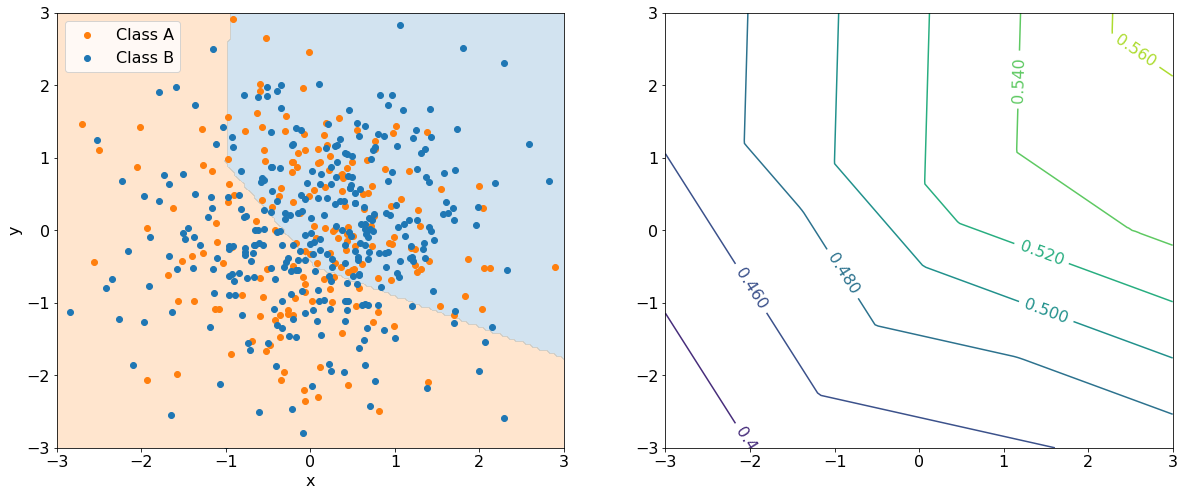

In [152]:
model5 = KerasClassifier(build_fn=create_model, layers=(50,50), regularizer=keras.regularizers.l2(0.01))
model5.fit(xy, classes, epochs=500, verbose=True)
vals = model5.predict(numpy.c_[xx.ravel(), yy.ravel()]).astype(float)
vals=vals.reshape(xx.shape)
pyplot.figure(figsize=(20,8))
pyplot.subplot(1,2,1)
pyplot.contourf(xx, yy, vals, levels=[-0.50, 0.50, 1.50], colors=['tab:orange', 'tab:blue'], alpha=0.2)
pyplot.scatter(numpy.extract(radii<1, xy[...,0]), numpy.extract(radii<1, xy[...,1]), label='Class A', color='tab:orange')
pyplot.scatter(numpy.extract(radii>1, xy[...,0]), numpy.extract(radii>1, xy[...,1]), label='Class B', color='tab:blue')
pyplot.xlabel('x'); pyplot.ylabel('y')
pyplot.xlim(-3,3); pyplot.ylim(-3,3)
pyplot.legend()
pyplot.subplot(1,2,2)
c=pyplot.contour(xx, yy, model5.predict_proba(numpy.c_[xx.ravel(), yy.ravel()]).astype(float)[...,1].reshape(xx.shape))
pyplot.clabel(c)
pyplot.draw()

Number of prediction fails for training sample: 149 (29.8%))
Number of prediction fails for testing sample: 162 (32.4%))


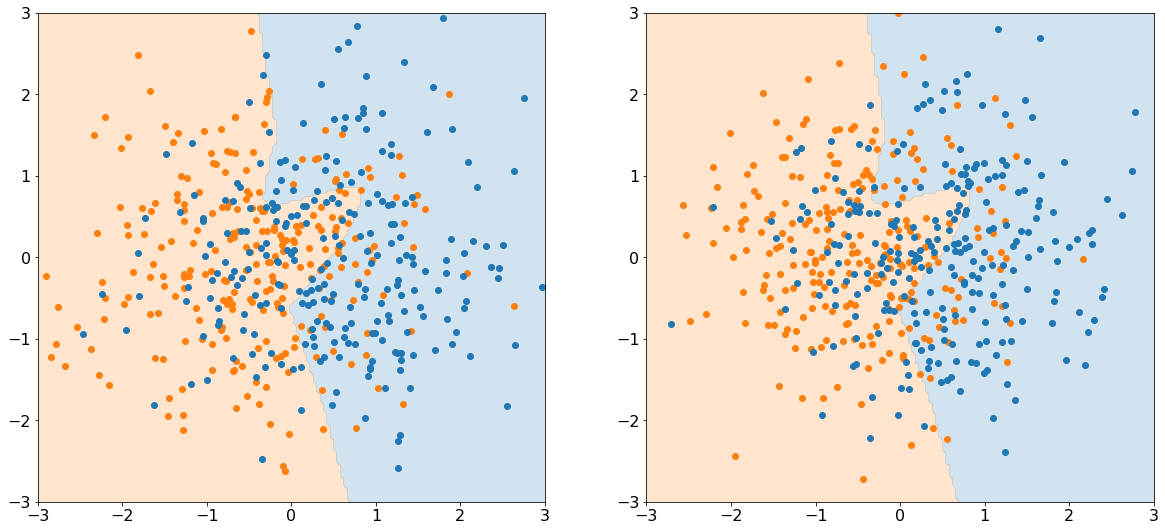

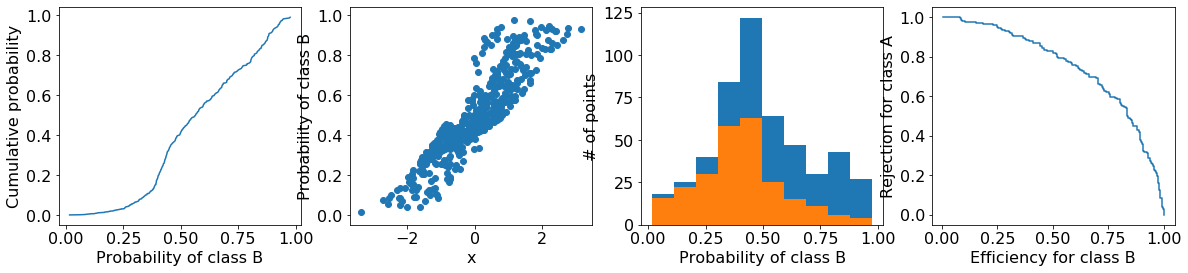

In [153]:
numpy.random.seed(27)
xy = numpy.random.normal(size=[500,2])
# shift x for one class to the left and for the other to the right
xy[...,0][:250] -= 0.5; xy[...,0][250:]+= 0.5
xytest = numpy.random.normal(size=[500,2])
xytest[...,0][:250] -= 0.5; xytest[...,0][250:]+= 0.5
classes = numpy.zeros(500).astype(int); classes[250:]=1
lrelu = lambda x: keras.activations.relu(x, alpha=0.1)
nnshift = KerasClassifier(build_fn=create_model, layers=(10,10), activation=lrelu, regularizer=keras.regularizers.l2(0.01))
nnshift.fit(xy, classes, epochs=15000, verbose=False, batch_size=500)
vals = nnshift.predict(numpy.c_[xx.ravel(), yy.ravel()]).astype(float)
vals=vals.reshape(xx.shape)

pyplot.figure(figsize=(20,9))
pyplot.subplot(1,2,1)
pyplot.contourf(xx, yy, vals, levels=[-0.5, 0.5, 1.5], colors=['tab:orange', 'tab:blue'], alpha=0.2)
pyplot.scatter(numpy.extract(classes==0, xy[...,0]), numpy.extract(classes==0, xy[...,1]), label='Class A', color='tab:orange')
pyplot.scatter(numpy.extract(classes==1, xy[...,0]), numpy.extract(classes==1, xy[...,1]), label='Class B', color='tab:blue')
pyplot.xlim(-3,3); pyplot.ylim(-3,3)
pyplot.subplot(1,2,2)
pyplot.contourf(xx, yy, vals, levels=[-0.5, 0.5, 1.5], colors=['tab:orange', 'tab:blue'], alpha=0.2)
pyplot.scatter(numpy.extract(classes==0, xytest[...,0]), numpy.extract(classes==0, xytest[...,1]), label='Class A', color='tab:orange')
pyplot.scatter(numpy.extract(classes==1, xytest[...,0]), numpy.extract(classes==1, xytest[...,1]), label='Class B', color='tab:blue')
pyplot.xlim(-3,3); pyplot.ylim(-3,3)
pyplot.draw()
fails=sum((nnshift.predict(xy).ravel()) ^ (classes).ravel())
print('Number of prediction fails for training sample: %d (%.1f%%))' % (fails, fails/len(xy)*100))
fails=sum((nnshift.predict(xytest).ravel()) ^ (classes).ravel())
print('Number of prediction fails for testing sample: %d (%.1f%%))' % (fails, fails/len(xytest)*100))

pyplot.figure(figsize=(20,4))
pyplot.subplot(1,4,1)
probs = nnshift.predict_proba(xytest)[...,1]
probssort = numpy.sort(probs)
pyplot.plot(probssort, numpy.cumsum(probssort)/numpy.sum(classes==1))
pyplot.xlabel('Probability of class B')
pyplot.ylabel('Cumulative probability')
pyplot.subplot(1,4,2)
pyplot.scatter(xytest[...,0], nnshift.predict_proba(xytest)[...,1])
pyplot.ylabel('Probability of class B')
pyplot.xlabel('x')
pyplot.subplot(1,4,3)
pyplot.hist([numpy.extract(classes==0, probs), numpy.extract(classes==1, probs)], stacked=True, color=['tab:orange', 'tab:blue'])
pyplot.xlabel('Probability of class B')
pyplot.ylabel('# of points')
pyplot.subplot(1,4,4)
probpoints = numpy.unique(probs)
yldA = numpy.array([sum((classes==0) & (probs >= _)) for _ in probpoints])
yldB = numpy.array([sum((classes==1) & (probs >= _)) for _ in probpoints])
rejA = 1-yldA/sum(classes==0)
effB = yldB/sum(classes==1)
pyplot.plot(effB, rejA)
pyplot.xlabel('Efficiency for class B')
pyplot.ylabel('Rejection for class A')
pyplot.draw()

## Various tricks

Neural network design is absolutely still in the stage of being an art.  I can only give a few suggestions...
* **Play around with hyperparameters** (number of layers, number of nodes in layers, batch size).
* **The input layer can be a strong bottleneck, so be generous with nodes**. The input layer is effectively a dimensionality reduction if there are fewer nodes than features. If information is eliminated already at the input layer stage, it can never be recovered.
* **Use LeakyReLU (or one of its cousins) instead of ReLU.** The ReLU response is identically zero for inputs $< 0$.  This means that if the input to the node gets stuck so that the entire range covered by training samples is $<0$, the node can never be pulled out of this state and is a "dead neuron".  (This is the ReLU version of the "vanishing gradient problem" which plagued sigmoid and tanh activations at large values of their inputs.) LeakyReLU avoids this by always having a non-zero gradient.
* **GPUs are great (sometimes)**: for very simple models GPUs don't help much, but very large models are extremely difficult to train without them.  The amount of memory on the GPUs can be an issue for storing samples.

## Extensions of the NN concept

Some clever types of NN used in particle physics...
* **Convolutional NNs**: the archetypical Deep Learning Networks, typically used for image classification. Unlike the NNs we have looked at, these are not densely connected.  Rather, they are structured in specific ways. "Convolutional" layers have neurons that look at small sections of the input (e.g. an $n\times n$ block of pixels), and then repeat that exact structure for all $n\times n$ blocks (so essentially trying to learn a "filter" for a feature in a small part of the image).  A number of different filters are trained at once (so they may learn to distinguish cats from cars). "Pooling" layers then combine the results from the filters in a region, and the process is repeated.  By having lots of repeated structure, and by not being fully-connected, a CNN manages to reduce the number of weights to a manageable size.
![CNN architecture](https://miro.medium.com/max/2510/1*vkQ0hXDaQv57sALXAJquxA.jpeg)
* **Recurrent NNs**: normal NNs "fire at once" and have no memory of the past. An RNN is applied in time steps, in which the output of each time step is an input to the next time step (there are other ways to implement this, but the concept is the same: the NN is effectively updated by previous inputs).  These can be very effective ways of implementing NNs with a variable number of feature inputs, e.g. where the number of tracks used for b-jet finding can vary.
![RNN architecture](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/1920px-Recurrent_neural_network_unfold.svg.png)
* **Mixture Density Networks**: these are NNs that predict probability distributions - they essentially try to learn likelihood functions empirically.  The "mixture" in the name comes from them typically predicting the parameters for components of a PDF (e.g. the means, standard deviations, and normalizations of a number of Gaussians).